In [2]:
#必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
%matplotlib inline
#自分で作った時系列データをpd.read_csvを使ってインポート
df = pd.read_csv('消費指標&収入.csv', parse_dates=[0], index_col=[0])

#自分で作ったが、NaN欄が多いために、dropna()を使って削除
x = df.dropna()
x.head()


,CPI,コアCPI,コアコアCPI,消費支出（一人当たり）,完全失業率,国内総生産(支出側)実質,民間最終消費支出,家計最終消費支出,除く持ち家の帰属家賃
2000-01-01,99.1,99.8,102.0,3374494.0,4.7,464239.8,264032.1,259196.1,217105.6
2001-01-01,98.4,99.0,101.1,3278199.0,5.0,461642.4,268771.1,263587.5,220521.8
2002-01-01,97.5,98.1,100.4,3238022.0,5.4,465762.7,271866.4,266870.2,222899.0
2003-01-01,97.2,97.8,99.9,3197186.0,5.3,475119.3,274048.3,268648.6,223811.0
2004-01-01,97.2,97.7,99.7,3213351.0,4.7,482802.9,276932.6,271551.3,226022.5


In [3]:
#データ型を確認（全てfloat64にしないと計算ツール（scipyやnumpyが扱えないから）
x.dtypes

CPI             float64
コアCPI           float64
コアコアCPI         float64
消費支出（一人当たり）     float64
完全失業率           float64
国内総生産(支出側)実質    float64
民間最終消費支出        float64
家計最終消費支出        float64
除く持ち家の帰属家賃      float64
dtype: object

In [4]:
#時系列データであるため、まずはプロットしたいが、単位が違いすぎるため、StandardScalerを使って「標準化」

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_std = ss.fit_transform(x)

X_std = pd.DataFrame(X_std, columns=x.columns)
X_std = X_std.set_index(x.index)
X_std

,CPI,コアCPI,コアコアCPI,消費支出（一人当たり）,完全失業率,国内総生産(支出側)実質,民間最終消費支出,家計最終消費支出,除く持ち家の帰属家賃
2000-01-01,1.153264,1.481129,1.926337,2.132271,0.464582,-1.510824,-1.932774,-1.979415,-1.994390
2001-01-01,0.569271,0.761724,1.316131,1.369085,0.920230,-1.651465,-1.472514,-1.512728,-1.469122
2002-01-01,-0.181578,-0.047608,0.841526,1.050662,1.527760,-1.428364,-1.171893,-1.163865,-1.103608
2003-01-01,-0.431861,-0.317385,0.502523,0.727017,1.375878,-0.921734,-0.959983,-0.974869,-0.963380
2004-01-01,-0.431861,-0.407310,0.366921,0.855132,0.464582,-0.505691,-0.679854,-0.666390,-0.623344
2005-01-01,-0.682143,-0.497236,0.027918,0.734197,0.008934,0.023226,-0.238669,-0.202550,-0.041338
2006-01-01,-0.431861,-0.407310,-0.243285,-0.066746,-0.446714,0.396991,-0.038501,0.007318,0.171202
2007-01-01,-0.431861,-0.407310,-0.311086,0.260443,-0.750479,0.723090,0.193037,0.272012,0.466494
2008-01-01,0.736126,0.851649,0.231320,0.239456,-0.598596,-0.220613,-0.377175,-0.347188,-0.513253
2009-01-01,-0.431861,-0.227459,-0.039883,-0.481963,1.072113,-0.791029,-0.130514,-0.107542,-0.258153


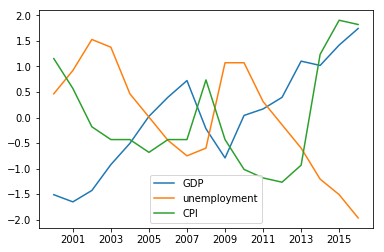

In [5]:
plt.plot(X_std['国内総生産(支出側)実質'], label='GDP')
plt.plot(X_std['完全失業率'], label='unemployment')
plt.plot(X_std['CPI'], label='CPI')

plt.legend()


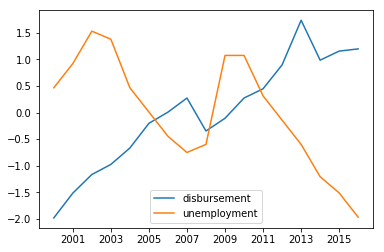

In [6]:
plt.plot(X_std['家計最終消費支出'], label='disbursement')
plt.plot(X_std['完全失業率'], label='unemployment')
plt.legend()

#関連性はありそうだが、時系列では単相関係数は使えない（理由：２変数とも、自己相関がある場合だと、相関係数が高く表示される。「見せかけの相関」になりやすい）

In [7]:
import statsmodels.api as st  #自己相関を使う　　自己相関とは、過去の値が現在にどのくらい影響を与えているのかを表す

/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
X_acf = st.tsa.stattools.acf(x['家計最終消費支出'])
X_acf

array([ 1.        ,  0.75711505,  0.56375903,  0.40520647,  0.18120254,
        0.04785316,  0.00877445, -0.05177464, -0.0553916 , -0.15347511,
       -0.28365866, -0.36581812, -0.43848724, -0.43671884, -0.29889375,
       -0.2405831 , -0.13910965])

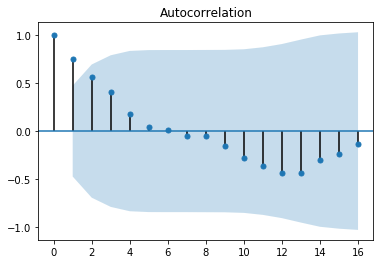

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111) #add_subplot(1,1,1) add_subplot(列, 行, 場所)
st.graphics.tsa.plot_acf(x['家計最終消費支出'], ax=ax1)
plt.show() 

#青い枠は95%信頼区間。信頼区間の領域を超えてプロットされているデータは、統計的に有意差がある値とみることができる
#有意がある => めったに起こらない領域がある。この値が大きいと「有意が大きい」となる
#信頼区間 => 有意でないことが起こる確率。つまり、普通によくあることがよくおこる確率のこと

#また、自己相関とラグ（日付の遅れ）をプロットしたグラフを「コレログラフ」という

In [10]:
# # 例
# fig1 = plt.figure()
# fig1.add_subplot(1, 1, 1)   #全体の枠
# fig1.add_subplot(3, 3, 1)   # 3x3の1つめ(左上)
# fig1.add_subplot(3, 3, 3)   # 3x3の3つめ(右上)
# fig1.add_subplot(3, 3, 8)   # 3x3の8つめ(真ん中下)

コレログラフを見てみると１つの波のような形をしている。
そのため、「民間最終消費支出」には「周期性がある」かもしれない
しかし、経済時系列データは、「トレンド性」、「季節性」が入っているため、分解してやらないと難しい

In [11]:
#階差系列データ作成　　階差系列とは一日ずらして計算する (n + 1 - n)の形になる　行う理由：トレンド成分の除去につながる
X_acf_diff = x['家計最終消費支出'] - x['家計最終消費支出'].shift()
X_acf_diff
print(x['家計最終消費支出'] , x['家計最終消費支出'].shift()) #shift()は１行ずらす

2000-01-01    259196.1
2001-01-01    263587.5
2002-01-01    266870.2
2003-01-01    268648.6
2004-01-01    271551.3
2005-01-01    275915.9
2006-01-01    277890.7
2007-01-01    280381.4
2008-01-01    274554.9
2009-01-01    276809.9
2010-01-01    280385.4
2011-01-01    282013.6
2012-01-01    286227.8
2013-01-01    294127.3
2014-01-01    287073.9
2015-01-01    288672.9
2016-01-01    289063.9
Name: 家計最終消費支出, dtype: float64 2000-01-01         NaN
2001-01-01    259196.1
2002-01-01    263587.5
2003-01-01    266870.2
2004-01-01    268648.6
2005-01-01    271551.3
2006-01-01    275915.9
2007-01-01    277890.7
2008-01-01    280381.4
2009-01-01    274554.9
2010-01-01    276809.9
2011-01-01    280385.4
2012-01-01    282013.6
2013-01-01    286227.8
2014-01-01    294127.3
2015-01-01    287073.9
2016-01-01    288672.9
Name: 家計最終消費支出, dtype: float64


In [12]:
X_acf_diff #1次階差

2000-01-01       NaN
2001-01-01    4391.4
2002-01-01    3282.7
2003-01-01    1778.4
2004-01-01    2902.7
2005-01-01    4364.6
2006-01-01    1974.8
2007-01-01    2490.7
2008-01-01   -5826.5
2009-01-01    2255.0
2010-01-01    3575.5
2011-01-01    1628.2
2012-01-01    4214.2
2013-01-01    7899.5
2014-01-01   -7053.4
2015-01-01    1599.0
2016-01-01     391.0
Name: 家計最終消費支出, dtype: float64

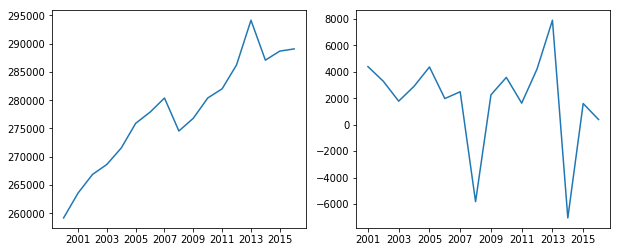

In [13]:
X_acf_diff = X_acf_diff.dropna()

fig = plt.figure(figsize=(10, 4))

# 原型列のグラフ
ax1 = fig.add_subplot(1,2, 1)
plt.plot(x['家計最終消費支出'])

# 階差系列のグラフ
ax2 = fig.add_subplot(1, 2, 2)
plt.plot(X_acf_diff)

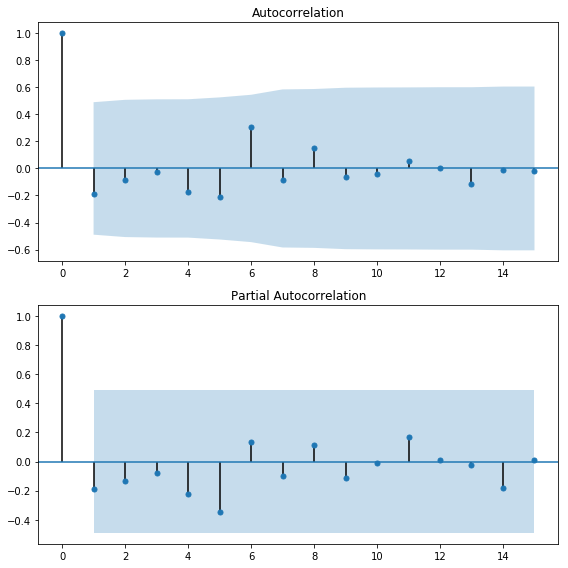

In [14]:
# 階差系列データでコレログラム作成
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
st.graphics.tsa.plot_acf(X_acf_diff, ax=ax1) 

# 偏自己相関(PACF)のグラフ  PACFとは、ある時点同士だけの関係性を表す　今日と二日前の相関を求めることができる
ax2 = fig.add_subplot(212)
st.graphics.tsa.plot_pacf(X_acf_diff, ax=ax2)

plt.tight_layout() 

上の２つのコレログラフは95%信頼係数のケースで考えた場合である。
上は自己相関(ACF)である
下は偏自己相関(PACF)である
どちらも5%有意水準と比べると、信頼区間内にあるため、「相関性がない」と言える

In [15]:
#ARMAモデルを使ってみる
#まずは、自動AMRA次数決定関数を使ってどれが良いのかを求める
resDiff = st.tsa.arma_order_select_ic(X_acf_diff, ic='aic', trend='nc')
resDiff

/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[

{'aic':             0           1           2
 0         NaN  314.905848  316.757236
 1  314.900408  316.936990  318.906916
 2  316.725113  318.903130         NaN
 3  317.955360  320.730112  322.344737
 4  319.928641  321.956854  344.873338, 'aic_min_order': (1, 0)}

In [16]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_1_1_0 = ARIMA(x['家計最終消費支出'], order=(1, 1, 0)).fit(dist=False)
ARIMA_1_1_0.params

/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

const               1856.245606
ar.L1.D.家計最終消費支出      -0.187647
dtype: float64

In [17]:
ari = ARIMA_1_1_0.predict('2002-01-01')
ari

/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2002-01-01    1380.530690
2003-01-01    1588.575269
2004-01-01    1870.853125
2005-01-01    1659.881249
2006-01-01    1385.559638
2007-01-01    1833.999193
2008-01-01    1737.191943
2009-01-01    3297.892194
2010-01-01    1781.420415
2011-01-01    1533.632135
2012-01-01    1899.037752
2013-01-01    1413.781795
2014-01-01     722.245143
2015-01-01    3528.116685
2016-01-01    1904.517054
Freq: AS-JAN, dtype: float64

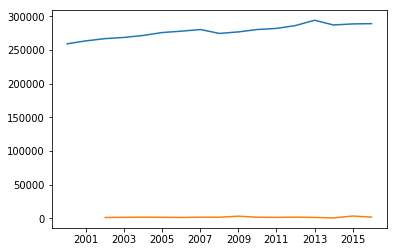

In [18]:
plt.plot(x['家計最終消費支出'])
plt.plot(ari)

ARMAモデルを使って、解を出したが、全く見当外れだったため、もう一度やり直す必要がある